In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Enhanced BUSTE data

In [16]:
enhanced_buste = pd.read_csv('/local/tarciso/masters/data/bus_trips/test/enhanced-buste/2017_05_01.csv', dtype = {'route': str, 'lineName': str, 'gender': 'category', 'birthdate': str}, parse_dates=['boarding_datetime','gps_datetime'])

In [17]:
enhanced_buste.sort_values(['cardNum','boarding_datetime']).head(20)

,cardNum,boarding_datetime,route,busCode,tripNum,gps_datetime,stopPointId,stop_lat,stop_lon,parent_station,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,problem,lineName,birthdate,gender
0,269440.0,2017-05-01 12:21:27,000,09005,NaN,NaT,14515,-25.483724,-49.350160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,20/02/90,M
1,304096.0,2017-05-01 15:55:06,000,06061,NaN,NaT,14553,-25.437655,-49.266632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,08/07/64,F
2,304148.0,2017-05-01 09:55:14,000,03001,NaN,NaT,14494,-25.512487,-49.295048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,24/05/72,F
3,304148.0,2017-05-01 09:55:18,000,03001,NaN,NaT,14494,-25.512487,-49.295048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,24/05/72,F
4,305823.0,2017-05-01 10:21:36,000,09024,NaN,NaT,26113,-25.472613,-49.294477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,15/07/72,M
5,312591.0,2017-05-01 22:19:40,160,BC010,12.0,2017-05-01 22:19:26,33069,-25.418018,-49.290745,NaN,1727.0,4870254.0,-25.418288,-49.290766,3138.401,NO_PROBLEM,J.MERCES/GUANABA,08/07/61,M
6,313781.0,2017-05-01 22:45:50,000,02027,NaN,NaT,25427,-25.433658,-49.263464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,12/04/80,M
7,316373.0,2017-05-01 05:44:08,000,00010,NaN,NaT,14492,-25.534177,-49.267780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,07/06/76,M
8,316606.0,2017-05-01 09:13:11,000,03037,NaN,NaT,26105,-25.448327,-49.287780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,11/12/59,F
9,316606.0,2017-05-01 17:38:27,650,HR410,9.0,2017-05-01 17:37:35,36308,-25.564289,-49.338920,NaN,4166.0,6543286.0,-25.564290,-49.338947,2331.529,NO_PROBLEM,STA.RITA/PINHEIRINHO,11/12/59,F


In [18]:
enhanced_buste.dtypes

cardNum                         float64
boarding_datetime        datetime64[ns]
route                            object
busCode                          object
tripNum                         float64
gps_datetime             datetime64[ns]
stopPointId                       int64
stop_lat                        float64
stop_lon                        float64
parent_station                  float64
shapeId                         float64
shapeSequence                   float64
shapeLat                        float64
shapeLon                        float64
distanceTraveledShape           float64
problem                          object
lineName                         object
birthdate                        object
gender                         category
dtype: object

In [19]:
trips_per_user = enhanced_buste.groupby(['cardNum']).cardNum.count().reset_index(name='num_trips').num_trips.value_counts(normalize=True) \
                    .reset_index(name='num_trips', level=0)

In [20]:
trips_per_user

,index,num_trips
0,1,0.495213
1,2,0.353943
2,3,0.077575
3,4,0.053353
4,6,0.008641
5,5,0.007132
6,8,0.001564
7,7,0.001481
8,10,0.000576
9,9,0.000439


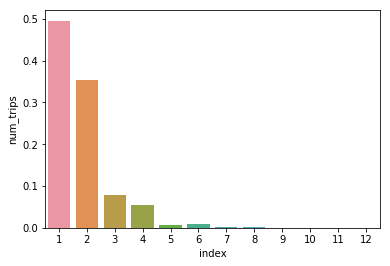

In [21]:
sns.barplot(x='index', y='num_trips', data=trips_per_user)

In [22]:
enhanced_buste.sort_values(['cardNum','boarding_datetime']).head()

,cardNum,boarding_datetime,route,busCode,tripNum,gps_datetime,stopPointId,stop_lat,stop_lon,parent_station,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,problem,lineName,birthdate,gender
0,269440.0,2017-05-01 12:21:27,000,09005,NaN,NaT,14515,-25.483724,-49.350160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,20/02/90,M
1,304096.0,2017-05-01 15:55:06,000,06061,NaN,NaT,14553,-25.437655,-49.266632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,08/07/64,F
2,304148.0,2017-05-01 09:55:14,000,03001,NaN,NaT,14494,-25.512487,-49.295048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,24/05/72,F
3,304148.0,2017-05-01 09:55:18,000,03001,NaN,NaT,14494,-25.512487,-49.295048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,24/05/72,F
4,305823.0,2017-05-01 10:21:36,000,09024,NaN,NaT,26113,-25.472613,-49.294477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,15/07/72,M


In [23]:
enhanced_buste[(enhanced_buste['stopPointId'] == 14515) & (pd.notnull(enhanced_buste['gps_datetime']))]

,cardNum,boarding_datetime,route,busCode,tripNum,gps_datetime,stopPointId,stop_lat,stop_lon,parent_station,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,problem,lineName,birthdate,gender


In [24]:
enhanced_buste[pd.notnull(enhanced_buste['parent_station'])].head(10)

,cardNum,boarding_datetime,route,busCode,tripNum,gps_datetime,stopPointId,stop_lat,stop_lon,parent_station,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,problem,lineName,birthdate,gender
117,392810.0,2017-05-01 16:01:56,020,BB613,5.0,2017-05-01 15:38:10,26228,-25.492283,-49.293083,14497.0,3258.0,6009986.0,-25.492286,-49.293104,33785.516,NO_PROBLEM,INTERBAIRR II H,01/12/85,F
132,397471.0,2017-05-01 14:49:41,335,DA011,12.0,2017-05-01 14:41:14,27869,-25.468826,-49.207926,14483.0,1867.0,5840757.0,-25.468775,-49.207809,7773.053,NO_PROBLEM,CENT./BOQUEIRÃO,26/04/64,M
186,441343.0,2017-05-01 18:36:58,050,JB301,8.0,2017-05-01 18:36:47,28391,-25.476371,-49.292429,14499.0,1719.0,5305389.0,-25.476293,-49.292438,4382.940,NO_PROBLEM,INTERBAIRROS V,22/03/59,M
317,617197.0,2017-05-01 17:27:40,040,LB300,1.0,2017-05-01 17:27:29,31626,-25.477218,-49.327605,14512.0,1717.0,3367032.0,-25.477136,-49.327509,13477.670,NO_PROBLEM,INTERB II ANTI H,23/10/82,M
326,621108.0,2017-05-01 13:44:13,020,HB300,2.0,2017-05-01 13:37:19,27715,-25.481900,-49.247078,14487.0,3264.0,6009085.0,-25.481877,-49.247065,35342.668,BETWEEN,INTERBAIRR II H,03/08/88,M
386,652290.0,2017-05-01 17:39:25,040,HB605,5.0,2017-05-01 17:38:49,31626,-25.477218,-49.327605,14512.0,1717.0,3367032.0,-25.477136,-49.327509,13477.670,NO_PROBLEM,INTERBAIRROS IV,08/01/87,M
436,680317.0,2017-05-01 13:35:11,828,JA018,6.0,2017-05-01 13:34:54,31625,-25.477238,-49.327456,14512.0,2234.0,4244209.0,-25.477157,-49.327399,9105.035,NO_PROBLEM,C.COMP/C.RASO,23/01/73,M
437,680317.0,2017-05-01 13:35:19,828,JA018,6.0,2017-05-01 13:34:54,31625,-25.477238,-49.327456,14512.0,2234.0,4244209.0,-25.477157,-49.327399,9105.035,NO_PROBLEM,C.COMP/C.RASO,23/01/73,M
462,702727.0,2017-05-01 05:01:02,617,HA284,8.0,2017-05-01 12:58:14,31051,-25.512806,-49.295302,14494.0,2038.0,6304828.0,-25.512806,-49.295258,13371.839,NO_PROBLEM,JD. LUDOVICA,20/12/58,M
525,724561.0,2017-05-01 05:06:45,628,HA025,7.0,2017-05-01 12:57:28,30432,-25.511768,-49.324391,14503.0,2055.0,6034783.0,-25.511814,-49.324445,4640.689,NO_PROBLEM,CARBOMAFRA,03/10/73,F


In [25]:
enhanced_buste = enhanced_buste.sort_values(['cardNum','boarding_datetime'])

In [26]:
enhanced_buste.head(50)

,cardNum,boarding_datetime,route,busCode,tripNum,gps_datetime,stopPointId,stop_lat,stop_lon,parent_station,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,problem,lineName,birthdate,gender
0,269440.0,2017-05-01 12:21:27,000,09005,NaN,NaT,14515,-25.483724,-49.350160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,20/02/90,M
1,304096.0,2017-05-01 15:55:06,000,06061,NaN,NaT,14553,-25.437655,-49.266632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,08/07/64,F
2,304148.0,2017-05-01 09:55:14,000,03001,NaN,NaT,14494,-25.512487,-49.295048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,24/05/72,F
3,304148.0,2017-05-01 09:55:18,000,03001,NaN,NaT,14494,-25.512487,-49.295048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,24/05/72,F
4,305823.0,2017-05-01 10:21:36,000,09024,NaN,NaT,26113,-25.472613,-49.294477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,15/07/72,M
5,312591.0,2017-05-01 22:19:40,160,BC010,12.0,2017-05-01 22:19:26,33069,-25.418018,-49.290745,NaN,1727.0,4870254.0,-25.418288,-49.290766,3138.401,NO_PROBLEM,J.MERCES/GUANABA,08/07/61,M
6,313781.0,2017-05-01 22:45:50,000,02027,NaN,NaT,25427,-25.433658,-49.263464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,12/04/80,M
7,316373.0,2017-05-01 05:44:08,000,00010,NaN,NaT,14492,-25.534177,-49.267780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,07/06/76,M
8,316606.0,2017-05-01 09:13:11,000,03037,NaN,NaT,26105,-25.448327,-49.287780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,11/12/59,F
9,316606.0,2017-05-01 17:38:27,650,HR410,9.0,2017-05-01 17:37:35,36308,-25.564289,-49.338920,NaN,4166.0,6543286.0,-25.564290,-49.338947,2331.529,NO_PROBLEM,STA.RITA/PINHEIRINHO,11/12/59,F


In [27]:
candidate_vehicles = enhanced_buste[(enhanced_buste['parent_station'] == enhanced_buste['stopPointId'].iloc[8]) & 
                               ((pd.to_datetime(enhanced_buste['gps_datetime']) > (pd.to_datetime(enhanced_buste['boarding_datetime'].iloc[8]) - pd.Timedelta(value=5,unit='m'))) & 
                                (pd.to_datetime(enhanced_buste['gps_datetime']) < (pd.to_datetime(enhanced_buste['boarding_datetime'].iloc[8]) + pd.Timedelta(value=20,unit='m'))))]

In [28]:
candidate_vehicles

,cardNum,boarding_datetime,route,busCode,tripNum,gps_datetime,stopPointId,stop_lat,stop_lon,parent_station,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,problem,lineName,birthdate,gender
112368,NaN,NaT,203,BD138,1.0,2017-05-01 09:16:17,25732,-25.448323,-49.287777,26105.0,3855.0,4649347.0,-25.448370,-49.287847,5065.989,NO_PROBLEM,NaN,NaN,NaN
114415,NaN,NaT,203,BD147,2.0,2017-05-01 09:26:48,25732,-25.448323,-49.287777,26105.0,3855.0,4649347.0,-25.448370,-49.287847,5065.989,NO_PROBLEM,NaN,NaN,NaN
232947,NaN,NaT,603,HD249,3.0,2017-05-01 09:14:53,25732,-25.448323,-49.287777,26105.0,3156.0,3758012.0,-25.448258,-49.287815,7432.708,NO_PROBLEM,NaN,NaN,NaN
233467,NaN,NaT,603,HD250,2.0,2017-05-01 09:33:05,25732,-25.448323,-49.287777,26105.0,3156.0,3758012.0,-25.448258,-49.287815,7432.708,BETWEEN,NaN,NaN,NaN


In [29]:
def find_candidate_vehicles(row,gps_df,lower_time_thresh = 0, higher_time_thresh = 40):
    return gps_df[(gps_df['parent_station'] == row['stopPointId']) & 
                               ((pd.to_datetime(gps_df['gps_datetime']) > (pd.to_datetime(row['boarding_datetime']) - pd.Timedelta(value=lower_time_thresh,unit='m'))) & 
                                (pd.to_datetime(gps_df['gps_datetime']) < (pd.to_datetime(row['boarding_datetime']) + pd.Timedelta(value=higher_time_thresh,unit='m'))))]

In [30]:
first_boarding = 40
second_boarding = 41

In [31]:
test_data = enhanced_buste.loc[first_boarding:second_boarding].head(1)

In [32]:
test_data

,cardNum,boarding_datetime,route,busCode,tripNum,gps_datetime,stopPointId,stop_lat,stop_lon,parent_station,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,problem,lineName,birthdate,gender
40,341036.0,2017-05-01 08:57:07,021,08025,NaN,NaT,41751,-25.441058,-49.3425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERB II ANTI H,09/07/69,F


In [33]:
nstop_lat = enhanced_buste['stop_lat'].loc[second_boarding]
nstop_lon = enhanced_buste['stop_lon'].loc[second_boarding]

In [34]:
nstop_lat, nstop_lon

(-25.4376552204, -49.266631957100003)

In [35]:
def dist(stop_lat, stop_lon,next_o_lat,next_o_lon):
    return np.arccos(
        np.sin(np.radians(stop_lat)) * np.sin(np.radians(next_o_lat)) + 
        np.cos(np.radians(stop_lat)) * np.cos(np.radians(next_o_lat)) * 
            np.cos(np.radians(stop_lon) - np.radians(next_o_lon))
    ) * 6371

In [36]:
dist(-7.213345, -35.907678, -7.219092, -35.877251)

3.4168198120895932

In [37]:
def is_vehicle_suitable(row,gps_df,next_stop_lat,next_stop_lon,higher_time_thresh=2):
    vehicle_trip = gps_df[(gps_df['busCode'] == row['busCode']) & (gps_df['tripNum'] == row['tripNum'])].sort_values('gps_datetime')
    vehicle_suitability = vehicle_trip[(vehicle_trip['gps_datetime'] > row['gps_datetime'])].apply(lambda row: dist(row['stop_lat'],row['stop_lon'],next_stop_lat,next_stop_lon), axis=1) \
                            .reset_index(name='dist')
    #print vehicle_suitability['dist']
    return len(vehicle_suitability[vehicle_suitability['dist'] <= 1.0]) > 0
    

In [38]:
for index, row in test_data.iterrows():
    cand_vehicles = find_candidate_vehicles(row,enhanced_buste)
    suitable_candidates = []
    for cand_index, cand_row in cand_vehicles.iterrows():
        if (is_vehicle_suitable(cand_row,enhanced_buste,nstop_lat, nstop_lon)):
            suitable_candidates.append(cand_row)
    suitable_candidates_df = pd.DataFrame.from_records(suitable_candidates, columns=cand_vehicles.columns)
    print suitable_candidates_df
    chosen_candidate = suitable_candidates_df.loc[suitable_candidates_df['gps_datetime'].idxmin()]
    print chosen_candidate

   cardNum boarding_datetime route busCode  tripNum        gps_datetime  \
0      NaN               NaT   303   DE710      2.0 2017-05-01 09:31:02   
1      NaN               NaT   303   DE713      2.0 2017-05-01 09:17:39   
2      NaN               NaT   303   DE719      2.0 2017-05-01 09:05:31   

   stopPointId   stop_lat   stop_lon  parent_station  shapeId  shapeSequence  \
0        25748 -25.441061 -49.342507         41751.0   3617.0      4399768.0   
1        25748 -25.441061 -49.342507         41751.0   3617.0      4399768.0   
2        25748 -25.441061 -49.342507         41751.0   3617.0      4399768.0   

    shapeLat   shapeLon  distanceTraveledShape     problem  lineName  \
0 -25.441017 -49.342554                456.152  NO_PROBLEM       NaN   
1 -25.441017 -49.342554                456.152  NO_PROBLEM       NaN   
2 -25.441017 -49.342554                456.152  NO_PROBLEM       NaN   

   birthdate  gender  
0        NaN     NaN  
1        NaN     NaN  
2        NaN     NaN